In [60]:
import pandas as pd

df_depression_dataset = pd.read_csv('Dataset\depression_dataset_reddit_cleaned.csv')
df_depression_dataset.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


<AxesSubplot: >

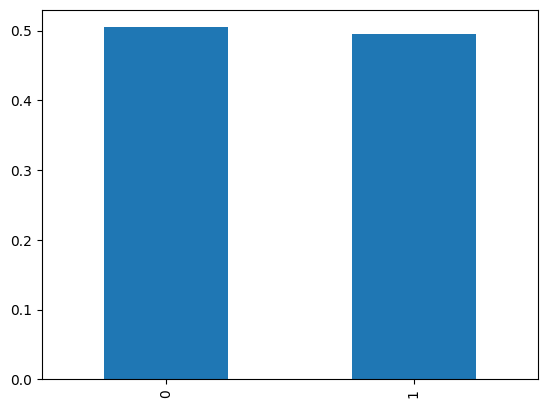

In [66]:
df_depression_dataset['is_depression'].value_counts(normalize=True).plot(kind="bar")

In [62]:
df_depression = df_depression_dataset[df_depression_dataset['is_depression'] == 1]
df_non_depression = df_depression_dataset[df_depression_dataset['is_depression'] == 0]

The maximum and average word count in a sentence from the depression category and the non-depression category:

In [63]:
print(df_depression['clean_text'].str.split(" ").apply(len).max())
print(df_non_depression['clean_text'].str.split(" ").apply(len).max())
print(df_depression['clean_text'].str.split(" ").apply(len).mean())
print(df_non_depression['clean_text'].str.split(" ").apply(len).mean())

4239
42
136.08718350300182
14.294615384615385


The 10 most common tri-grams and their frequencies  
According the result, ["http", "twitpic", "com", "tinyurl", "co"] should be added to Stop_words

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

Stop_words = set(stopwords.words('english'))
CV = CountVectorizer(ngram_range = (3,3), stop_words = Stop_words)
count = CV.fit_transform(df_depression_dataset['clean_text'])
pd.DataFrame(count.sum(axis = 0), columns = CV.get_feature_names_out()).T.sort_values(0, ascending=False).head(20)

,0
mental health issue,39
doe anyone else,38
make feel like,37
http twitpic com,34
feel like shit,32
make feel better,30
felt like wa,27
every single day,26
sometimes feel like,26
wan na go,25


Word cloud plotting for Depressed and Non Depressed message  
According the result, ["wa"] should be added to Stop_words

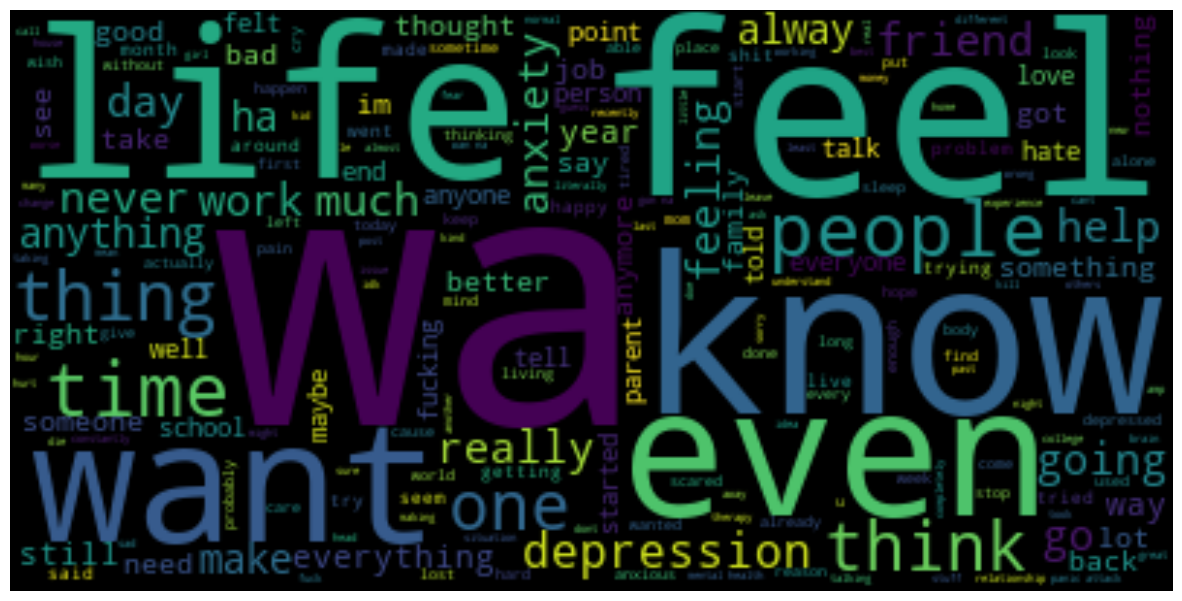

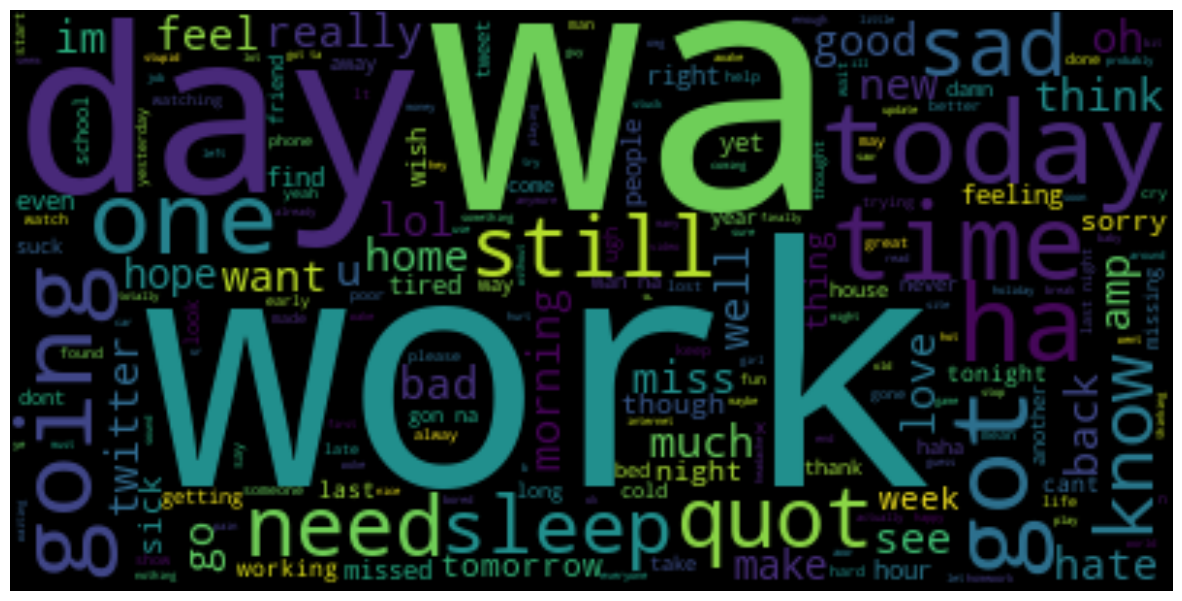

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stop_words = ["http", "twitpic", "com", "tinyurl", "co"] + stopwords.words('english')
def Stop_words(text):
    text = [word for word in text.split(' ') if word not in stop_words]
    text = " ".join(text)
    return text

df_depression_dataset['clean_text'] = df_depression_dataset['clean_text'].apply(Stop_words)
df_depression = df_depression_dataset[df_depression_dataset['is_depression'] == 1]
df_non_depression = df_depression_dataset[df_depression_dataset['is_depression'] == 0]

text = " ".join(t for t in df_depression['clean_text'])
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

text = " ".join(t for t in df_non_depression['clean_text'])
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()